In [3]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf

In [4]:
df_final_2 = pd.read_csv("/content/df_final_2.csv")

In [5]:
df_final_2

,Company,IPO_Status,Mean_Sentiment_Score,Num_Articles,IPO_Date,IPO_Date.1,IPO_Date +30,IPO_Ticker,PE/VC_backing,Underwriter_Rating,...,Founder_Control_dummy,High_Concentration_Dummy,Strategic_Ownership_Dummy,Article_Count,First_Day_Performance,First_Month_performance,IPO_Issue_Size_Clean,Log_of_Age,Mean_Sentiment_Score_standard,Num_Articles_log
0,4BASEBIO_PLC,Post-IPO,0.587443,25,2021-02-17,2021-02-17,2021-03-19,4BB.L,0,2,...,1,1,1,34,0.046931,-0.120690,16.49,0.000000,-0.038617,3.218876
1,4BASEBIO_PLC,Pre-IPO,0.347777,9,2021-02-17,2021-02-17,2021-03-19,4BB.L,0,2,...,1,1,1,34,0.046931,-0.120690,16.49,0.000000,-1.483719,2.197225
2,4GLOBAL_PLC,Post-IPO,0.205803,28,2021-12-07,2021-12-07,2022-01-06,4GBL.L,0,3,...,0,0,0,39,0.223684,-0.120430,15.11,2.944439,-2.339774,3.332205
3,4GLOBAL_PLC,Pre-IPO,0.643039,10,2021-12-07,2021-12-07,2022-01-06,4GBL.L,0,3,...,0,0,0,39,0.223684,-0.120430,15.11,2.944439,0.296613,2.302585
4,ABERFORTH_GEARED_VALUE_INCOME_TRUST_PLC,Post-IPO,0.996628,67,2024-07-01,2024-07-01,2024-07-31,AGVI.L,0,1,...,0,1,1,78,0.000000,-0.148649,18.90,0.000000,2.428634,4.204693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,WINDWARD_LTD,Pre-IPO,0.569104,67,2021-12-06,2021-12-06,2022-01-05,WNWD.L,1,2,...,0,0,0,86,0.235795,0.200000,17.36,2.397895,-0.149191,4.204693
289,WISE_PLC,Post-IPO,0.712091,76,2021-07-07,2021-07-07,2021-08-06,WISEa.L,1,1,...,1,1,0,92,0.016234,-0.252396,18.20,2.302585,0.712972,4.330733
290,WISE_PLC,Pre-IPO,0.734974,15,2021-07-07,2021-07-07,2021-08-06,WISEa.L,1,1,...,1,1,0,92,0.016234,-0.252396,18.20,2.302585,0.850947,2.708050
291,ZENOVA_GROUP_PLC,Post-IPO,0.422303,10,2021-07-22,2021-07-22,2021-08-21,ZED.L,0,3,...,0,0,0,11,0.070039,-0.047273,15.32,0.000000,-1.034351,2.302585


In [6]:
post_ipo_df = df_final_2[df_final_2["IPO_Status"] == "Post-IPO"].copy()

In [17]:
post_ipo_df

,Company,IPO_Status,Mean_Sentiment_Score,Num_Articles,IPO_Date,IPO_Date.1,IPO_Date +30,IPO_Ticker,PE/VC_backing,Underwriter_Rating,Age at IPO,Log_IPO_Issue_Size,FTSE_100_IVI,Market_Performance,Technology_Dummy,Healthcare_Dummy,Financials_Dummy,Energy_Utilities_Dummy,Basic_Materials_Dummy,Industrials_Dummy,Consumer_Dummy,RealEstate_Dummy,Founder_Control_dummy,High_Concentration_Dummy,Strategic_Ownership_Dummy,Article_Count,First_Day_Performance,First_Month_performance,IPO_Issue_Size_Clean,Log_of_Age,Mean_Sentiment_Score_standard,Num_Articles_log
0,4BASEBIO_PLC,Post-IPO,0.587443,25,2021-02-17,2021-02-17,2021-03-19,4BB.L,0,2,1,£16.49,16.36,0.0064,0,1,0,0,0,0,0,0,1,1,1,34,0.046931,-0.120690,16.49,0.000000,-0.038617,3.218876
1,ACTIVEOPS_PLC,Post-IPO,0.628583,9,2021-03-29,2021-03-29,2021-04-28,AOM.L,1,2,40,£18.14,13.15,-0.0426,1,0,0,0,0,0,0,0,0,0,0,17,0.200000,-0.083333,18.14,3.688879,0.209445,2.197225
2,AIR_ASTANA_JOINT_STOCK_COMPANY,Post-IPO,0.510778,230,2024-02-09,2024-02-09,2024-03-10,AIRAq.L,0,1,23,£14.11,14.24,0.0385,0,0,0,0,0,0,1,0,0,1,1,358,0.125000,-0.066667,14.11,3.135494,-0.500880,5.438079
3,ALKEMY_CAPITAL_INVESTMENTS_PLC,Post-IPO,0.423020,15,2021-09-27,2021-09-27,2021-10-27,ALKALK.L,0,3,18,£11.00,16.10,0.0006,0,0,0,0,1,0,0,0,0,1,0,27,0.015000,-0.059113,11.00,2.890372,-1.030031,2.708050
4,ALPHAWAVE_IP_GROUP_PLC,Post-IPO,0.575864,31,2021-05-13,2021-05-13,2021-06-12,AWE.L,0,1,18,£20.57,14.94,0.0130,1,0,0,0,0,0,0,0,1,1,1,100,0.083333,0.030769,20.57,2.890372,-0.108430,3.433987
5,APTAMER_GROUP_PLC,Post-IPO,0.452805,13,2021-12-22,2021-12-22,2022-01-21,APTA.L,1,2,13,£16.19,12.94,-0.0467,0,1,0,0,0,0,0,0,1,1,0,22,0.500000,0.000000,16.19,2.564949,-0.850437,2.564949
6,AQUILA_ENERGY_EFFICIENCY_TRUST_PLC,Post-IPO,0.823165,3,2021-06-02,2021-06-02,2021-07-02,AEET.L,0,2,1,£18.05,10.16,-0.0060,0,0,1,0,0,0,0,0,0,0,0,12,0.000000,0.000000,18.05,0.000000,1.382712,1.098612
7,ARECOR_THERAPEUTICS_PLC,Post-IPO,0.554818,12,2021-06-03,2021-06-03,2021-07-03,AREC.L,1,3,14,£15.94,13.92,-0.0205,0,1,0,0,0,0,0,0,1,1,1,18,0.100000,0.000000,15.94,2.639057,-0.235331,2.484907
8,ARROW_EXPLORATION_CORP,Post-IPO,0.694889,26,2021-10-25,2021-10-25,2021-11-24,AXLA.L,0,2,10,£11.74,15.60,0.0326,0,0,0,1,0,0,0,0,0,1,1,35,0.033333,0.021505,11.74,2.302585,0.609248,3.258097
9,ASHINGTON_INNOVATION_PLC,Post-IPO,0.635416,14,2023-06-06,2023-06-06,2023-07-06,ASHI.L,0,3,16,£13.60,18.52,0.0240,0,0,1,0,0,0,0,0,1,1,0,19,0.013889,-0.010959,13.60,2.772589,0.250648,2.639057


In [8]:
summary_post_ipo_df = pd.DataFrame({
    'Data Type': post_ipo_df.dtypes,
    'Non-Null Count': post_ipo_df.count(),
    'Null Count': post_ipo_df.isna().sum(),
    'Unique Values': post_ipo_df.nunique(),
    #'Sample Values': df_result.apply(lambda x: x.unique()[:5])  # small peek into values
})
print(summary_post_ipo_df)

                              Data Type  Non-Null Count  Null Count  \
Company                          object             150           0   
IPO_Status                       object             150           0   
Mean_Sentiment_Score            float64             150           0   
Num_Articles                      int64             150           0   
IPO_Date                         object             150           0   
IPO_Date.1                       object             150           0   
IPO_Date +30                     object             150           0   
IPO_Ticker                       object             150           0   
PE/VC_backing                     int64             150           0   
Underwriter_Rating                int64             150           0   
Age at IPO                        int64             150           0   
Log_IPO_Issue_Size               object             150           0   
FTSE_100_IVI                    float64             150           0   
Market

In [9]:
q1=post_ipo_df[["Mean_Sentiment_Score_standard",
                "Log_of_Age",
                "IPO_Issue_Size_Clean", "Market_Performance",
                "Num_Articles_log","First_Month_performance"]].quantile(0.25)

q3=post_ipo_df[["Mean_Sentiment_Score_standard",
                "Log_of_Age",
                "IPO_Issue_Size_Clean",
                "Market_Performance",
                "Num_Articles_log","First_Month_performance"]].quantile(0.75)

IQR= q3-q1

In [10]:
df_numeric=post_ipo_df[["Mean_Sentiment_Score_standard",
                "Log_of_Age",
                "IPO_Issue_Size_Clean",
                "Market_Performance",
                "Num_Articles_log","First_Month_performance"]]

In [11]:
mask = ~((df_numeric < (q1 - 1.5 * IQR)) | (df_numeric > (q3 + 1.5 * IQR))).any(axis=1)

In [12]:
post_ipo_df=post_ipo_df[mask].reset_index(drop=True)

In [18]:
pd.set_option("display.max_rows",None)

In [30]:
pd.set_option("display.max_columns",None)

In [31]:
post_ipo_df

,Company,IPO_Status,Mean_Sentiment_Score,Num_Articles,IPO_Date,IPO_Date.1,IPO_Date +30,IPO_Ticker,PE/VC_backing,Underwriter_Rating,Age at IPO,Log_IPO_Issue_Size,FTSE_100_IVI,Market_Performance,Technology_Dummy,Healthcare_Dummy,Financials_Dummy,Energy_Utilities_Dummy,Basic_Materials_Dummy,Industrials_Dummy,Consumer_Dummy,RealEstate_Dummy,Founder_Control_dummy,High_Concentration_Dummy,Strategic_Ownership_Dummy,Article_Count,First_Day_Performance,First_Month_performance,IPO_Issue_Size_Clean,Log_of_Age,Mean_Sentiment_Score_standard,Num_Articles_log
0,4BASEBIO_PLC,Post-IPO,0.587443,25,2021-02-17,2021-02-17,2021-03-19,4BB.L,0,2,1,£16.49,16.36,0.0064,0,1,0,0,0,0,0,0,1,1,1,34,0.046931,-0.120690,16.49,0.000000,-0.038617,3.218876
1,ACTIVEOPS_PLC,Post-IPO,0.628583,9,2021-03-29,2021-03-29,2021-04-28,AOM.L,1,2,40,£18.14,13.15,-0.0426,1,0,0,0,0,0,0,0,0,0,0,17,0.200000,-0.083333,18.14,3.688879,0.209445,2.197225
2,AIR_ASTANA_JOINT_STOCK_COMPANY,Post-IPO,0.510778,230,2024-02-09,2024-02-09,2024-03-10,AIRAq.L,0,1,23,£14.11,14.24,0.0385,0,0,0,0,0,0,1,0,0,1,1,358,0.125000,-0.066667,14.11,3.135494,-0.500880,5.438079
3,ALKEMY_CAPITAL_INVESTMENTS_PLC,Post-IPO,0.423020,15,2021-09-27,2021-09-27,2021-10-27,ALKALK.L,0,3,18,£11.00,16.10,0.0006,0,0,0,0,1,0,0,0,0,1,0,27,0.015000,-0.059113,11.00,2.890372,-1.030031,2.708050
4,ALPHAWAVE_IP_GROUP_PLC,Post-IPO,0.575864,31,2021-05-13,2021-05-13,2021-06-12,AWE.L,0,1,18,£20.57,14.94,0.0130,1,0,0,0,0,0,0,0,1,1,1,100,0.083333,0.030769,20.57,2.890372,-0.108430,3.433987
5,APTAMER_GROUP_PLC,Post-IPO,0.452805,13,2021-12-22,2021-12-22,2022-01-21,APTA.L,1,2,13,£16.19,12.94,-0.0467,0,1,0,0,0,0,0,0,1,1,0,22,0.500000,0.000000,16.19,2.564949,-0.850437,2.564949
6,AQUILA_ENERGY_EFFICIENCY_TRUST_PLC,Post-IPO,0.823165,3,2021-06-02,2021-06-02,2021-07-02,AEET.L,0,2,1,£18.05,10.16,-0.0060,0,0,1,0,0,0,0,0,0,0,0,12,0.000000,0.000000,18.05,0.000000,1.382712,1.098612
7,ARECOR_THERAPEUTICS_PLC,Post-IPO,0.554818,12,2021-06-03,2021-06-03,2021-07-03,AREC.L,1,3,14,£15.94,13.92,-0.0205,0,1,0,0,0,0,0,0,1,1,1,18,0.100000,0.000000,15.94,2.639057,-0.235331,2.484907
8,ARROW_EXPLORATION_CORP,Post-IPO,0.694889,26,2021-10-25,2021-10-25,2021-11-24,AXLA.L,0,2,10,£11.74,15.60,0.0326,0,0,0,1,0,0,0,0,0,1,1,35,0.033333,0.021505,11.74,2.302585,0.609248,3.258097
9,ASHINGTON_INNOVATION_PLC,Post-IPO,0.635416,14,2023-06-06,2023-06-06,2023-07-06,ASHI.L,0,3,16,£13.60,18.52,0.0240,0,0,1,0,0,0,0,0,1,1,0,19,0.013889,-0.010959,13.60,2.772589,0.250648,2.639057


In [ ]:
summary_post_ipo_df = pd.DataFrame({
    'Data Type': post_ipo_df.dtypes,
    'Non-Null Count': post_ipo_df.count(),
    'Null Count': post_ipo_df.isna().sum(),
    'Unique Values': post_ipo_df.nunique(),
    #'Sample Values': df_result.apply(lambda x: x.unique()[:5])  # small peek into values
})
print(summary_post_ipo_df)

                              Data Type  Non-Null Count  Null Count  \
Company                          object             121           0   
IPO_Status                       object             121           0   
Mean_Sentiment_Score            float64             121           0   
Num_Articles                      int64             121           0   
IPO_Date                         object             121           0   
IPO_Date.1                       object             121           0   
IPO_Date +30                     object             121           0   
IPO_Ticker                       object             121           0   
PE/VC_backing                     int64             121           0   
Underwriter_Rating                int64             121           0   
Age at IPO                        int64             121           0   
Log_IPO_Issue_Size               object             121           0   
FTSE_100_IVI                    float64             121           0   
Market

In [ ]:
post_ipo_df.rename(columns={'PE/VC_backing': 'PE_VC_backing'}, inplace=True)

In [ ]:
post_ipo_df["PE_VC_backing_centered"]=post_ipo_df["PE_VC_backing"]-post_ipo_df["PE_VC_backing"].mean()
post_ipo_df["Log_of_Age_centered"]=post_ipo_df["Log_of_Age"]-post_ipo_df["Log_of_Age"].mean()
post_ipo_df["IPO_Issue_Size_Clean_centered"]=post_ipo_df["IPO_Issue_Size_Clean"]-post_ipo_df["IPO_Issue_Size_Clean"].mean()
post_ipo_df["Underwriter_Rating_centered"]=post_ipo_df["Underwriter_Rating"]-post_ipo_df["Underwriter_Rating"].mean()
post_ipo_df["Mean_Sentiment_Score_standard_centered"]=post_ipo_df["Mean_Sentiment_Score_standard"]-post_ipo_df["Mean_Sentiment_Score_standard"].mean()

In [ ]:
#model = sm.OLS(y, X).fit()
model = smf.ols('First_Month_performance ~ Mean_Sentiment_Score_standard_centered + PE_VC_backing_centered + Underwriter_Rating_centered + Log_of_Age_centered + IPO_Issue_Size_Clean_centered + Market_Performance + Technology_Dummy + Healthcare_Dummy + Financials_Dummy + Energy_Utilities_Dummy + Basic_Materials_Dummy + Industrials_Dummy + Consumer_Dummy + RealEstate_Dummy + Founder_Control_dummy + High_Concentration_Dummy + Strategic_Ownership_Dummy + Num_Articles_log + Log_of_Age_centered:Mean_Sentiment_Score_standard_centered + Mean_Sentiment_Score_standard_centered:Underwriter_Rating_centered + PE_VC_backing_centered:Mean_Sentiment_Score_standard_centered + Mean_Sentiment_Score_standard_centered:IPO_Issue_Size_Clean_centered', data=post_ipo_df).fit()

In [ ]:
# Print the summary
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     First_Month_performance   R-squared:                       0.142
Model:                                 OLS   Adj. R-squared:                 -0.040
Method:                      Least Squares   F-statistic:                    0.7817
Date:                     Fri, 06 Jun 2025   Prob (F-statistic):              0.735
Time:                             15:43:47   Log-Likelihood:                 98.630
No. Observations:                      121   AIC:                            -153.3
Df Residuals:                           99   BIC:                            -91.75
Df Model:                               21                                         
Covariance Type:                 nonrobust                                         
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [ ]:
robust_model = model.get_robustcov_results(cov_type='HC3')
print(robust_model.summary())

                               OLS Regression Results                              
Dep. Variable:     First_Month_performance   R-squared:                       0.142
Model:                                 OLS   Adj. R-squared:                 -0.040
Method:                      Least Squares   F-statistic:                     3.587
Date:                     Fri, 06 Jun 2025   Prob (F-statistic):           6.70e-06
Time:                             15:43:50   Log-Likelihood:                 98.630
No. Observations:                      121   AIC:                            -153.3
Df Residuals:                           99   BIC:                            -91.75
Df Model:                               21                                         
Covariance Type:                       HC3                                         
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

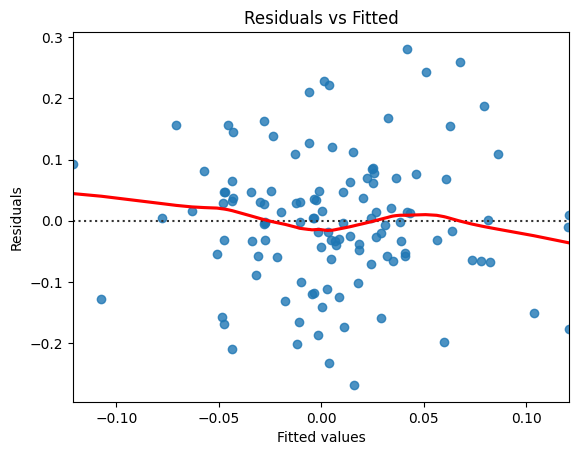

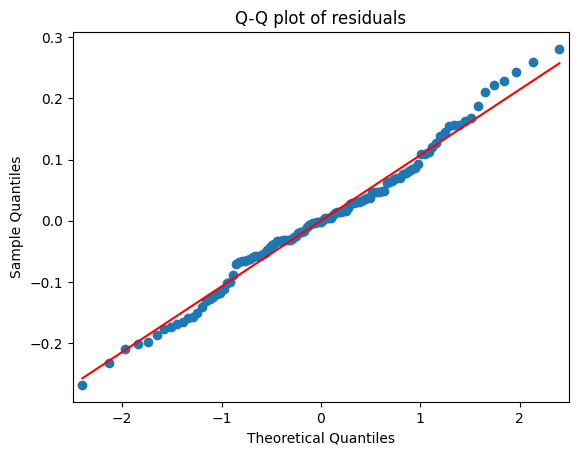

Variance Inflation Factors:
                                              Feature       VIF
0                                           Intercept  0.000000
1              Mean_Sentiment_Score_standard_centered  1.265445
2                              PE_VC_backing_centered  1.263798
3                         Underwriter_Rating_centered  1.988061
4                                 Log_of_Age_centered  1.463414
5                       IPO_Issue_Size_Clean_centered  1.902155
6                                  Market_Performance  1.203100
7                                    Technology_Dummy       inf
8                                    Healthcare_Dummy       inf
9                                    Financials_Dummy       inf
10                             Energy_Utilities_Dummy       inf
11                              Basic_Materials_Dummy       inf
12                                  Industrials_Dummy       inf
13                                     Consumer_Dummy       inf
14          

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
# 1. Residuals & Fitted
fitted_vals = robust_model.fittedvalues
residuals = robust_model.resid

# 2. Linearity & Homoscedasticity
sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# 3. Normality of Residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q plot of residuals')
plt.show()

# 4. Multicollinearity (define X manually)
# Extract design matrix from model
X = robust_model.model.exog
X_names = robust_model.model.exog_names

vif_data = pd.DataFrame()
vif_data['Feature'] = X_names
vif_data['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print("Variance Inflation Factors:")
print(vif_data)

# 5. Breusch-Pagan Test for Heteroscedasticity
bp_test = het_breuschpagan(residuals, X)
print(f"\nBreusch-Pagan p-value: {bp_test[1]:.4f}")